# Observations:

## 1. Basic idea
* Original shape: (6448, 3)
* Review column had 55 null values which were dropped.
* New shape: (6393, 3)


## 2. Word Cloud
* The most common words main word cloud were:
    * clean
    * comfortable
    * friendly
    * helpful
    * great
    * location
    * staff
    * room
    * amenities
    * pool
    * breakfast<br>
   This suggests that guests are generally satisfied with the cleanliness, comfort, and amenities of the hotel. They also appreciate the friendly and helpful staff. The location of the hotel is also a plus, as is the pool and breakfast.<br><br>
   
* Positive words with high frequency:
    * room
    * hotel
    * staff
    * great
    * helpful
    * friendly
    * clean
    * nice
    * good
    * location<br>
    This implies the hotel visitors who left these reviews had a positive experience overall. Some specific aspects of the hotel that were mentioned positively include the staff, the room, the amenities, and the location.<br>
    Some specific conclusions that can be drawn from the word cloud are:
    The hotel staff is friendly and helpful.
    The hotel rooms are clean and comfortable.
    The hotel has a variety of amenities that guests appreciate, such as a pool and a restaurant.
    The hotel is located in a convenient location.<br><br>
      
* Negative reviews having words with high frequency:
    * room
    * hotel
    * bed
    * night
    * small
    * dirty
    * stay
    * check
    * staff
    * bathroom<br>
    Based on the word cloud you sent, the following conclusions can be drawn:
    *     The hotel room is in a bad condition.
    *     The hotel room is not clean.
    *     The hotel room is small and cramped.
    *     The hotel staff is rude and unhelpful.
    *     The service is bad.
    
    
## 3. Time Series Analysis
*     Based on the sentiment over time graph, the following conclusions can be drawn:
        * The overall sentiment is positive, with the mean sentiment score above 0.
        * The sentiment has been increasing over time, with some fluctuations.
        * The highest sentiment score was in September 2019, and the lowest sentiment score was in November 2018.
    The graph does suggest that the overall sentiment towards the product or service is positive and that it has been increasing over time.<br><br>
*     The sentiment has been generally positive in 2018, but there have been some fluctuations. The highest sentiment score was in September, and the lowest sentiment score was in November.
Some conclusions that can be drawn from the graph:
    * The company's overall sentiment is positive.
    * The company has been able to maintain a positive sentiment over time, despite some fluctuations.<br><br>
* Overall, hotel guests were satisfied with their experience in the first eight months of 2019, with the mean sentiment score above 0 for most of the period. There was a slight decrease in sentiment from January to August. 


## 4. Sentiment Aalysis Over Locations
* Based on the graph showing the mean sentiment across locations, the following conclusions can be drawn:
    * The mean sentiment is highest in Redford, Utah, and lowest in White Sulphur Springs, West Virginia.
    * The mean sentiment is generally higher in the United States than in other countries.
    * There is a wide range of mean sentiment across locations, with some cities having a very positive sentiment and others having a very negative sentiment.
    
    
## 5. Positive, negative & neutral reviews
* The hotel appears to be having an overall positive review from the guests.
* 2019 seems to having more reviews in all three categories as compared to 2018. In extension, this also indicates that 2019 had more guests visiting as compared to 2018.

# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud

In [2]:
df = pd.read_csv("/kaggle/input/hotel-reviews/Data Analyst - Test Data - US.csv")

In [3]:
df['Review'] = df['Review'].str.replace('\n', '')
df['Review'] = df['Review'].str.replace('Read more', '')
df['Review'] = df['Review'].str.replace('Read less', '')

## Testing Sentiment Analysis Sample

In [4]:
TextBlob("I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!").sentiment

Sentiment(polarity=0.5142857142857143, subjectivity=0.6304761904761905)

In [5]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

## Overview of the dataset

In [6]:
df.head(5)

,Review,date,Location
0,I was very impressed with the resort. Great st...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [7]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [8]:
df.head(5)

,Review,date,Location
0,I was very impressed with the resort. Great st...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [9]:
df.shape

(6448, 3)

In [10]:
df.isna().sum()

Review        55
date           0
Location    4737
dtype: int64

In [11]:
df = df.dropna(subset=['Review'])

In [12]:
df.isna().sum()

Review         0
date           0
Location    4688
dtype: int64

In [13]:
df.shape

(6393, 3)

# Calculating sentiment polarity and subjectivity for each comment

In [14]:
polarity=[]
subjectivity=[]
for i in df['Review'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

# Adding the sentiment polarity & subjectivity columns to the data

In [15]:
df['polarity']=polarity
df['subjectivity']=subjectivity

# Word Cloud

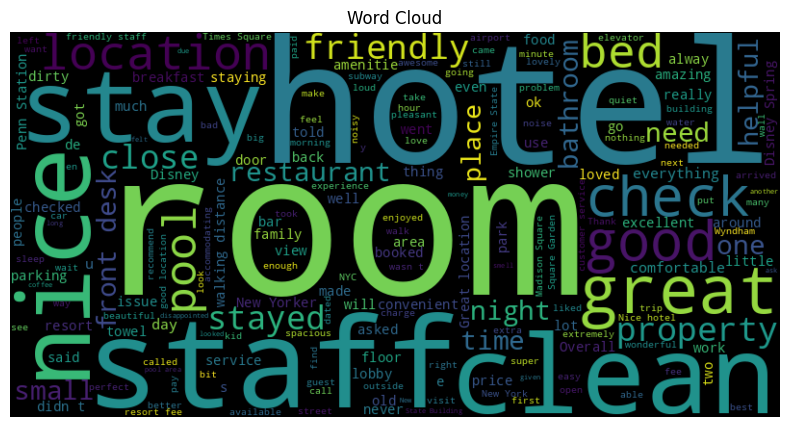

In [16]:
filtered_reviews = df['Review']

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud")
plt.axis('off')
plt.show()

The most common words are:
<ul>
<li>clean</li>
<li>comfortable</li>
<li>friendly</li>
<li>helpful</li>
<li>great</li>
<li>location</li>
<li>staff</li>
<li>room</li>
<li>amenities</li>
<li>pool</li>
<li>breakfast</li>
</ul>
This suggests that guests are generally satisfied with the cleanliness, comfort, and amenities of the hotel. They also appreciate the friendly and helpful staff. The location of the hotel is also a plus, as is the pool and breakfast.

# Positive Reviews

## All Positive Reviews

In [17]:
df[['Review','date','Location','polarity','subjectivity']][df.polarity>0].head(5)

,Review,date,Location,polarity,subjectivity
0,I was very impressed with the resort. Great st...,2019-08-20,Sebastian,0.514286,0.630476
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.250000,0.558333
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.378788,0.423737
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,0.102222,0.485556
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.404524,0.522381


## Word Cloud (All Positive Reviews)

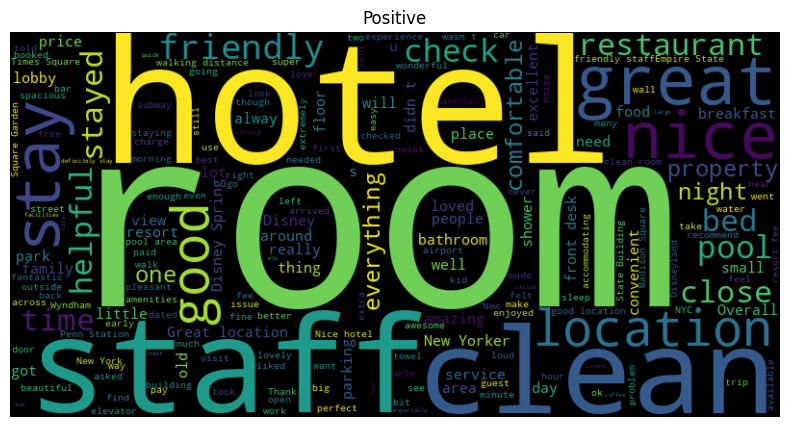

In [18]:
filtered_reviews = df[df['polarity'] > 0]['Review']

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive")
plt.axis('off')
plt.show()

Positive words with high frequency:
<ul>
    <li>room</li>
    <li>hotel</li>
    <li>staff</li>
    <li>great</li>
    <li>helpful</li>
    <li>friendly</li>
    <li>clean</li>
    <li>nice</li>
    <li>good</li>
    <li>location</li>
</ul><br>
This implies the hotel visitors who left these reviews had a positive experience overall. Some specific aspects of the hotel that were mentioned positively include the staff, the room, the amenities, and the location.<br><br>
Some specific conclusions that can be drawn from the word cloud are:
<ul>
    <li>The hotel staff is friendly and helpful.</li>
    <li>The hotel rooms are clean and comfortable.</li>
    <li>The hotel has a variety of amenities that guests appreciate, such as a pool and a restaurant.</li>
    <li>The hotel is located in a convenient location.</li>
</ul>

## Highly Positive Reviews

In [19]:
df[['Review','date','Location','polarity','subjectivity']][df.polarity>0.8].head(5)

,Review,date,Location,polarity,subjectivity
180,Great hotel! Room was wonderful and the pools ...,2019-08-03,"Palm Island, Florida",0.833333,0.883333
188,"Everything was perfect, the staff and faciliti...",2019-08-02,NaN,0.900000,0.866667
191,Excellent facilities. Great for families or co...,2019-08-01,NaN,0.900000,0.875000
195,All good! We are very happy and the joy is in ...,2019-08-01,NaN,0.958333,0.600000
265,"Beautiful place, great memories, a must visit ...",2019-07-26,NaN,0.825000,0.875000


## Word Cloud (Highly Positive Reviews)

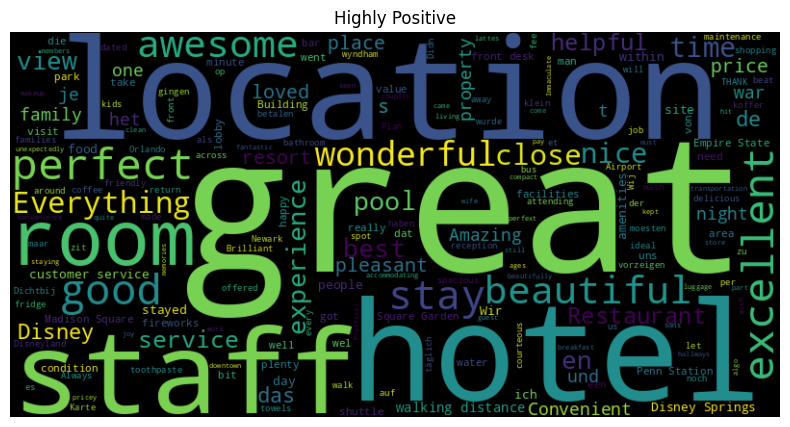

In [20]:
filtered_reviews = df[df['polarity'] > 0.8]['Review']

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Highly Positive")
plt.axis('off')
plt.show()

Highly positive reviews having words with high frequency:
<ul>
    <li>location</li>
    <li>hotel</li>
    <li>staff</li>
    <li>great</li>
    <li>excellent</li>
    <li>room</li>
    <li>beautiful</li>
    <li>everything</li>
    <li>awesome</li>
</ul><br>
This implies that the hotel visitors who left these reviews had a positive experience overall. Some specific aspects of the hotel that were mentioned positively include the staff, the room, the amenities, and the location.

# Negative Reviews

## All Negative Reviews

In [21]:
df[['Review','date','Location','polarity','subjectivity']][df.polarity<0].head(5)

,Review,date,Location,polarity,subjectivity
18,"It was great for what we needed, a place to sl...",2019-08-19,NaN,-0.044444,0.554861
32,Rooms very dirty and aged. Breakfast was of po...,2019-08-17,NaN,-0.337857,0.535714
46,This property is advertised as being renovated...,2019-08-14,Pennsylvania,-0.226717,0.552424
56,"The rooms are terribly small, almost claustrop...",2019-08-13,NaN,-0.430556,0.563889
63,I liked everything except the smoking by the p...,2019-08-12,"San Antonio,TX",-0.155000,0.833333


## Word Cloud (All Negative Reviews)

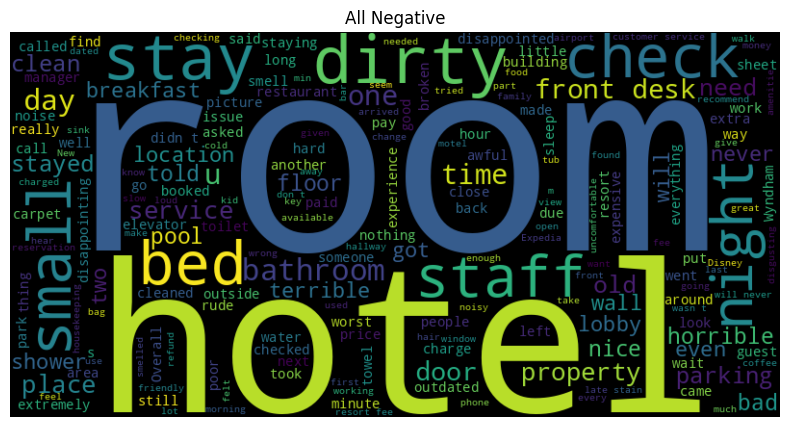

In [22]:
filtered_reviews = df[df['polarity']<0]['Review']

filtered_reviews = filtered_reviews.astype(str)

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All Negative")
plt.axis('off')
plt.show()

Negative reviews having words with high frequency:
<ul>
    <li>room</li>
    <li>hotel</li>
    <li>bed</li>
    <li>night</li>
    <li>small</li>
    <li>dirty</li>
    <li>stay</li>
    <li>check</li>
    <li>staff</li>
    <li>bathroom</li>
</ul><br>
Based on the word cloud you sent, the following conclusions can be drawn:
<ul>
<li>The hotel room is in a bad condition.</li>
<li>The hotel room is not clean.</li>
<li>The hotel room is small and cramped.</li>
<li>The hotel staff is rude and unhelpful.</li>
    <li>The service is bad.</li>
</ul>

## Displaying highly negative reviews

In [23]:
df[['Review','date','Location','polarity','subjectivity']][df.polarity<-0.5].head(5)

,Review,date,Location,polarity,subjectivity
290,Very dirty! Dirty Far away Dirty Dirty Did I s...,2019-07-24,NaN,-0.545833,0.866667
541,"Horrible service, tight space and poor conditi...",2019-07-02,Miami,-0.526190,0.628571
551,"The room floor was dirty & sticky, and bath sh...",2019-07-02,NaN,-0.600000,0.800000
569,I came 8 pm to chek in. It took the lady about...,2019-06-30,NaN,-0.520000,0.780000
617,This property is dated and the room was worn (...,2019-06-25,NaN,-0.520000,1.000000


## Word Cloud (Highly Negative Reviews)

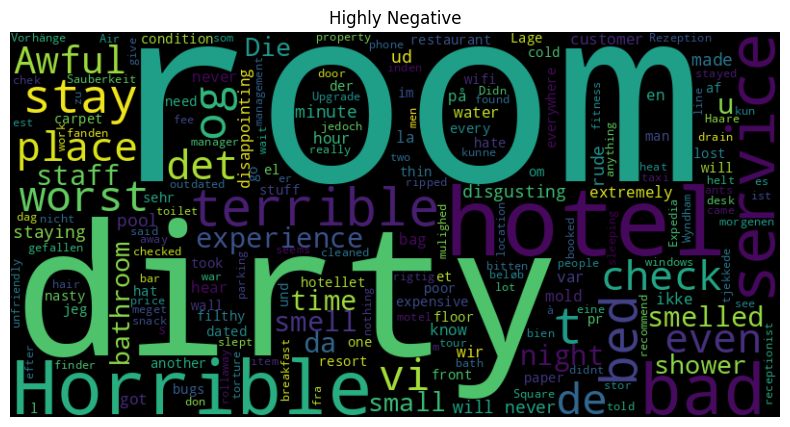

In [24]:
filtered_reviews = df[df['polarity']<-0.5]['Review']

filtered_reviews = filtered_reviews.astype(str)

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Highly Negative")
plt.axis('off')
plt.show()


Negative reviews having words with high frequency:
<ul>
    <li>room</li>
    <li>dirty</li>
    <li>horrible</li>
    <li>hotel</li>
    <li>service</li>
    <li>bad</li>
    <li>bed</li>
</ul><br>

# Neutral Reviews

## All Neutral Reviews

In [25]:
df[['Review','date','Location','polarity','subjectivity']][df.polarity==0].head(5)

,Review,date,Location,polarity,subjectivity
6,Old. Musty. Motel. Bath need an update asap !...,2019-08-19,NaN,0.0,0.0
23,基本的に問題なしでした。 清潔で防音も普通な方で、水回りも清潔でシャワーの水圧も問題なしです...,2019-08-18,NaN,0.0,0.0
31,Les chambres familiales sont pratiques (nous é...,2019-08-17,Montréal,0.0,0.0
47,Vétuste mérite un sacré rafraîchissement Empl...,2019-08-14,Toulon,0.0,0.0
49,El aire acondicionado goteaba y la alfombra es...,2019-08-14,NaN,0.0,0.0


## Word Cloud (Neutral Reviews)

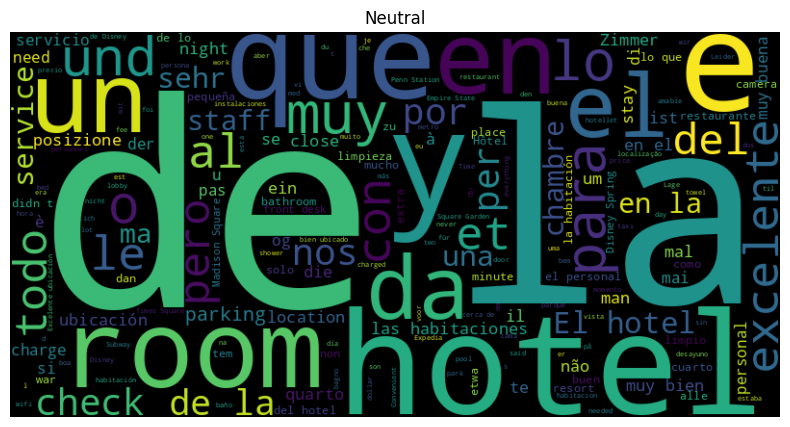

In [26]:
filtered_reviews = df[df['polarity']==0]['Review']

filtered_reviews = filtered_reviews.astype(str)

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Neutral")
plt.axis('off')
plt.show()


# Subjective Reviews

## Highly Factual Reviews

In [27]:
df[['Review','date','Location','polarity','subjectivity']][df.subjectivity<=0.2].head(5)

,Review,date,Location,polarity,subjectivity
6,Old. Musty. Motel. Bath need an update asap !...,2019-08-19,NaN,0.0,0.0
23,基本的に問題なしでした。 清潔で防音も普通な方で、水回りも清潔でシャワーの水圧も問題なしです...,2019-08-18,NaN,0.0,0.0
31,Les chambres familiales sont pratiques (nous é...,2019-08-17,Montréal,0.0,0.0
47,Vétuste mérite un sacré rafraîchissement Empl...,2019-08-14,Toulon,0.0,0.0
49,El aire acondicionado goteaba y la alfombra es...,2019-08-14,NaN,0.0,0.0


## Word Cloud (Highly Factual Reviews)

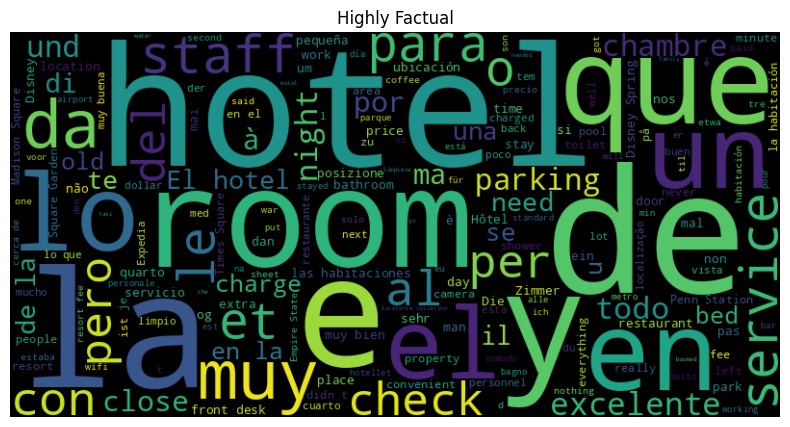

In [28]:
filtered_reviews = df[df['subjectivity']<=0.2]['Review']

filtered_reviews = filtered_reviews.astype(str)

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Highly Factual")
plt.axis('off')
plt.show()


## Highly Opinionated Reviews

In [29]:
df[['Review','date','Location','polarity','subjectivity']][df.subjectivity>0.8].head(5)

,Review,date,Location,polarity,subjectivity
7,Loved the layout of the hotel and the relaxing...,2019-08-19,NaN,0.266667,0.866667
12,"Location was great, lobby area was nice but ro...",2019-08-19,NaN,0.700000,0.875000
22,"Awesome location, easy access to sights and su...",2019-08-18,NaN,0.716667,0.916667
63,I liked everything except the smoking by the p...,2019-08-12,"San Antonio,TX",-0.155000,0.833333
72,Everything was great. When we walked into the ...,2019-08-12,Corinth,0.790000,0.875000


## Word Cloud (Highly Opinionated Reviews)

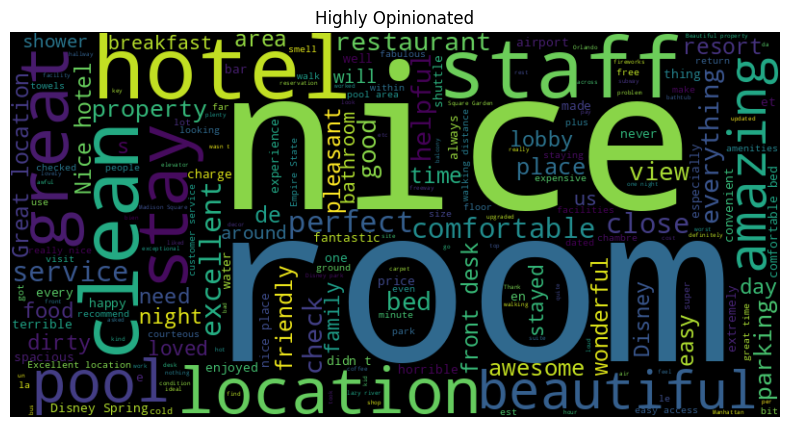

In [30]:
filtered_reviews = df[df['subjectivity']>0.8]['Review']

filtered_reviews = filtered_reviews.astype(str)

text = ' '.join(filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Highly Opinionated")
plt.axis('off')
plt.show()


The highly opinionated reviews also appear to be having an overall positive outlook, with words like hotel, staff, room, stay and nice having very high frequency.

# Analytical Study

## Dataset Division

In [31]:
df_2018 = df[df['date'].dt.year == 2018]
df_2019 = df[df['date'].dt.year == 2019]

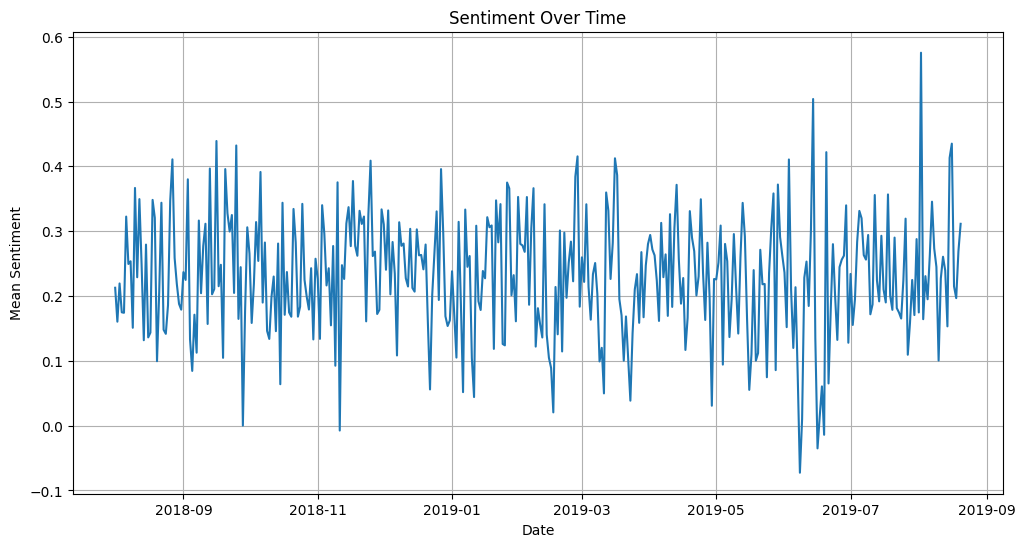

In [32]:
date_sentiment = df.groupby(df['date'].dt.date)['polarity'].mean()

plt.figure(figsize=(12, 6))
date_sentiment.plot()
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()

Based on the sentiment over time graph, the following conclusions can be drawn:
<ul>
<li>The overall sentiment is positive, with the mean sentiment score above 0.</li>
<li>The sentiment has been increasing over time, with some fluctuations.</li>
<li>The highest sentiment score was in September 2019, and the lowest sentiment score was in November 2018.</li>
</ul><br>
The graph does suggest that the overall sentiment towards the product or service is positive and that it has been increasing over time.

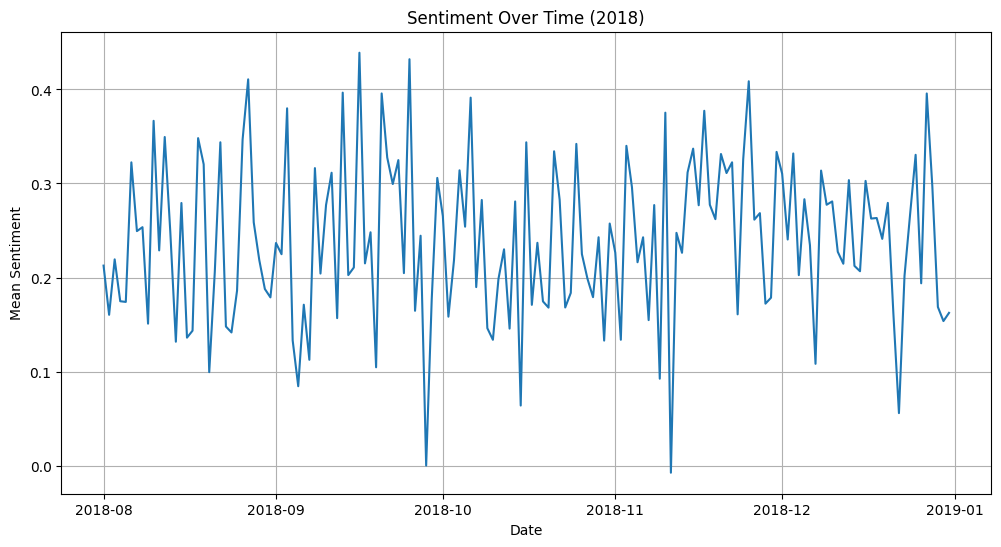

In [33]:
date_sentiment_2018 = df_2018.groupby(df_2018['date'].dt.date)['polarity'].mean()

plt.figure(figsize=(12, 6))
date_sentiment_2018.plot()
plt.title('Sentiment Over Time (2018)')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()

The graph shows that the sentiment has been generally positive in 2018, but there have been some fluctuations. The highest sentiment score was in September, and the lowest sentiment score was in November.

Some conclusions that can be drawn from the graph:
<ul>
    <li>The company's overall sentiment is positive.</li>
<li>The company has been able to maintain a positive sentiment over time, despite some fluctuations.</li>
</ul>

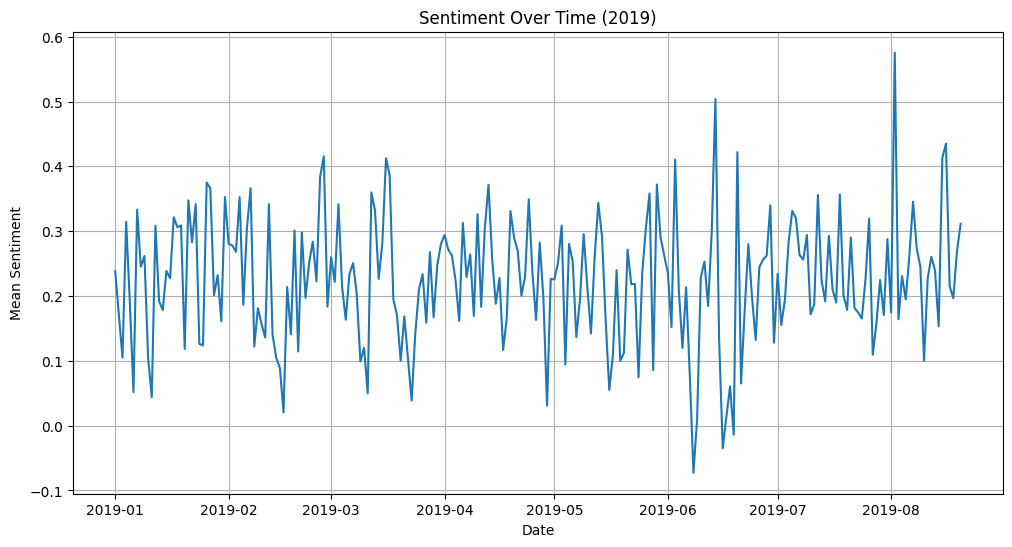

In [34]:
date_sentiment_2019 = df_2019.groupby(df_2019['date'].dt.date)['polarity'].mean()

plt.figure(figsize=(12, 6))
date_sentiment_2019.plot()
plt.title('Sentiment Over Time (2019)')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()

Overall, hotel guests were satisfied with their experience in the first eight months of 2019, with the mean sentiment score above 0 for most of the period. There was a slight decrease in sentiment from January to August.

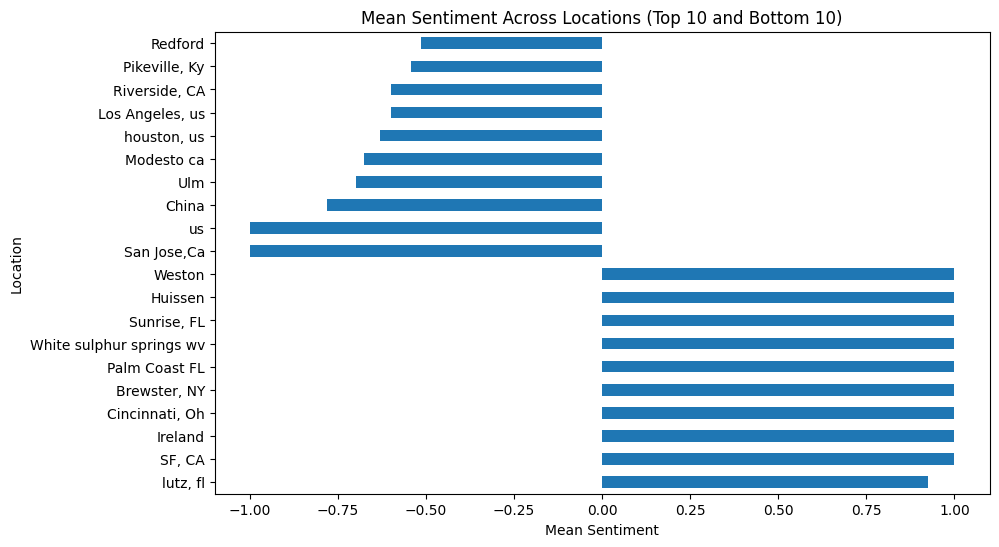

In [35]:
location_sentiment = df.groupby('Location')['polarity'].mean()

location_sentiment = location_sentiment.sort_values()

top = location_sentiment.tail(10)
bottom = location_sentiment.head(10)

new_locations = pd.concat([top, bottom])

plt.figure(figsize=(10, 6))
new_locations.plot(kind='barh')
plt.title('Mean Sentiment Across Locations (Top 10 and Bottom 10)')
plt.xlabel('Mean Sentiment')
plt.ylabel('Location')
plt.show()

Based on the graph showing the mean sentiment across locations, the following conclusions can be drawn:
<ul>
<li>The mean sentiment is highest in Redford, Utah, and lowest in White Sulphur Springs, West Virginia.</li>
<li>The mean sentiment is generally higher in the United States than in other countries.</li>
<li>There is a wide range of mean sentiment across locations, with some cities having a very positive sentiment and others having a very negative sentiment.</li>
</ul>

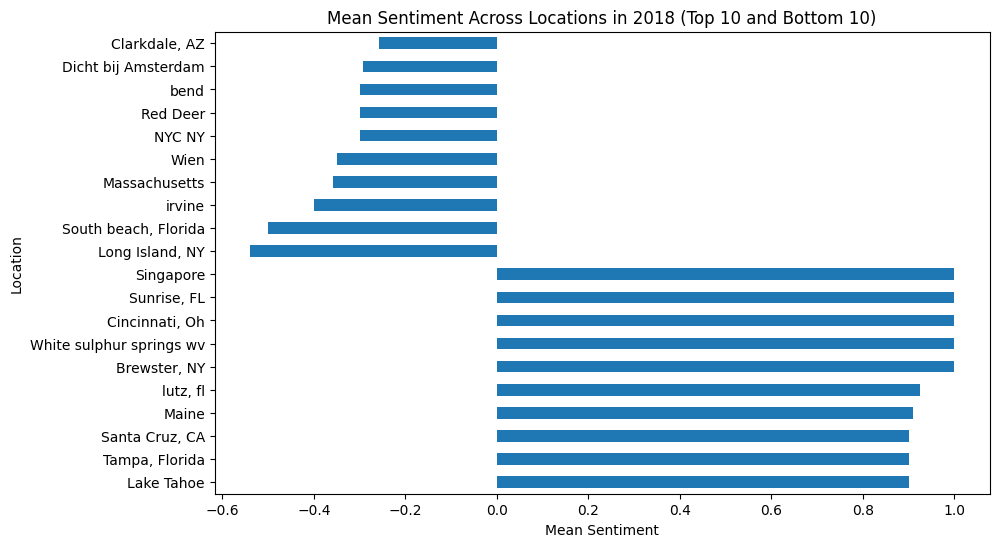

In [36]:
location_sentiment_2018 = df_2018.groupby('Location')['polarity'].mean()
location_sentiment_2018 = location_sentiment_2018.sort_values()

top_2018 = location_sentiment_2018.tail(10)
bottom_2018 = location_sentiment_2018.head(10)

new_locations_2018 = pd.concat([top_2018, bottom_2018])

# Create a bar plot to compare sentiment for the selected locations in 2018
plt.figure(figsize=(10, 6))
new_locations_2018.plot(kind='barh')
plt.title('Mean Sentiment Across Locations in 2018 (Top 10 and Bottom 10)')
plt.xlabel('Mean Sentiment')
plt.ylabel('Location')
plt.show()


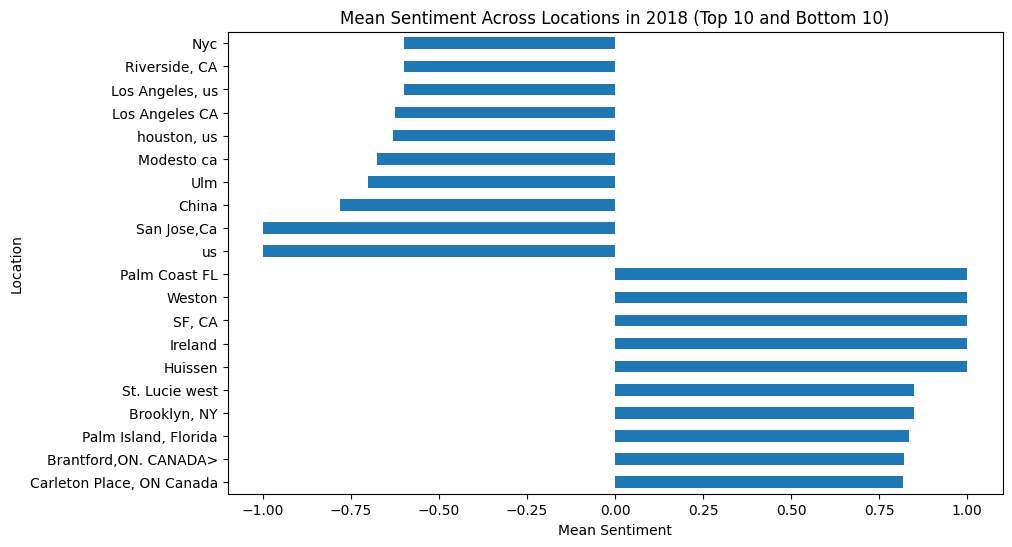

In [37]:
location_sentiment_2019 = df_2019.groupby('Location')['polarity'].mean()
location_sentiment_2019 = location_sentiment_2019.sort_values()

top_2019 = location_sentiment_2019.tail(10)
bottom_2019 = location_sentiment_2019.head(10)

new_locations_2019 = pd.concat([top_2019, bottom_2019])

# Create a bar plot to compare sentiment for the selected locations in 2018
plt.figure(figsize=(10, 6))
new_locations_2019.plot(kind='barh')
plt.title('Mean Sentiment Across Locations in 2018 (Top 10 and Bottom 10)')
plt.xlabel('Mean Sentiment')
plt.ylabel('Location')
plt.show()


# Distribution of Polarity

<Axes: >

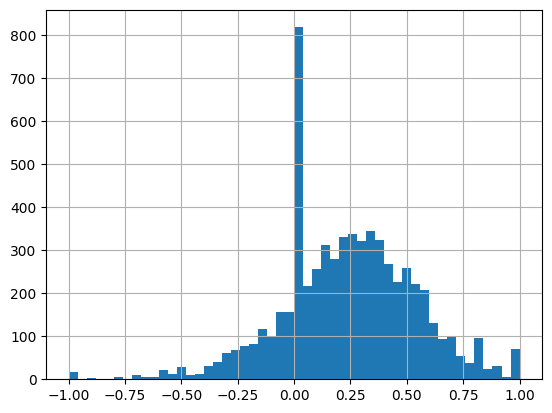

In [38]:
df.polarity.hist(bins=50)

# Distribution of Subjectivity

<Axes: >

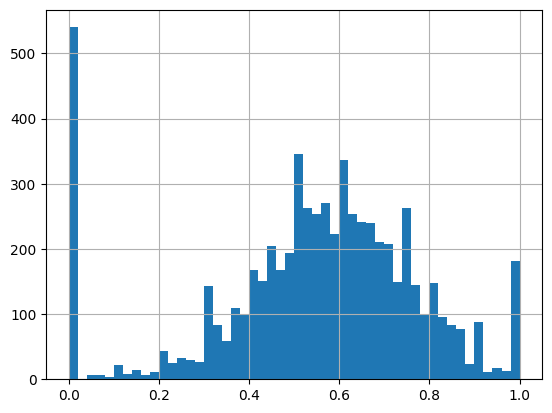

In [39]:
df.subjectivity.hist(bins=50)

# Conversion of polarity values from continuous to categorical

In [40]:
df['polarity'][df.polarity==0]= 0
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

In [41]:
df.head(5)

,Review,date,Location,polarity,subjectivity
0,I was very impressed with the resort. Great st...,2019-08-20,Sebastian,1.0,0.630476
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,1.0,0.558333
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,1.0,0.423737
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,1.0,0.485556
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,1.0,0.522381


# Count of positive, negative & neutral reviews

polarity
 1.0    4734
-1.0    1020
 0.0     639
Name: count, dtype: int64

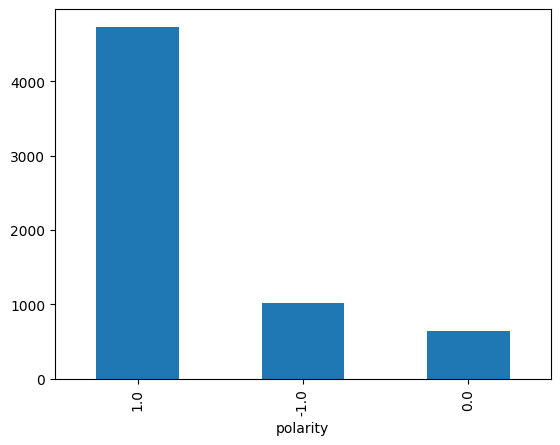

In [42]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()

The hotel appears to be having an overall positive review from the guests.

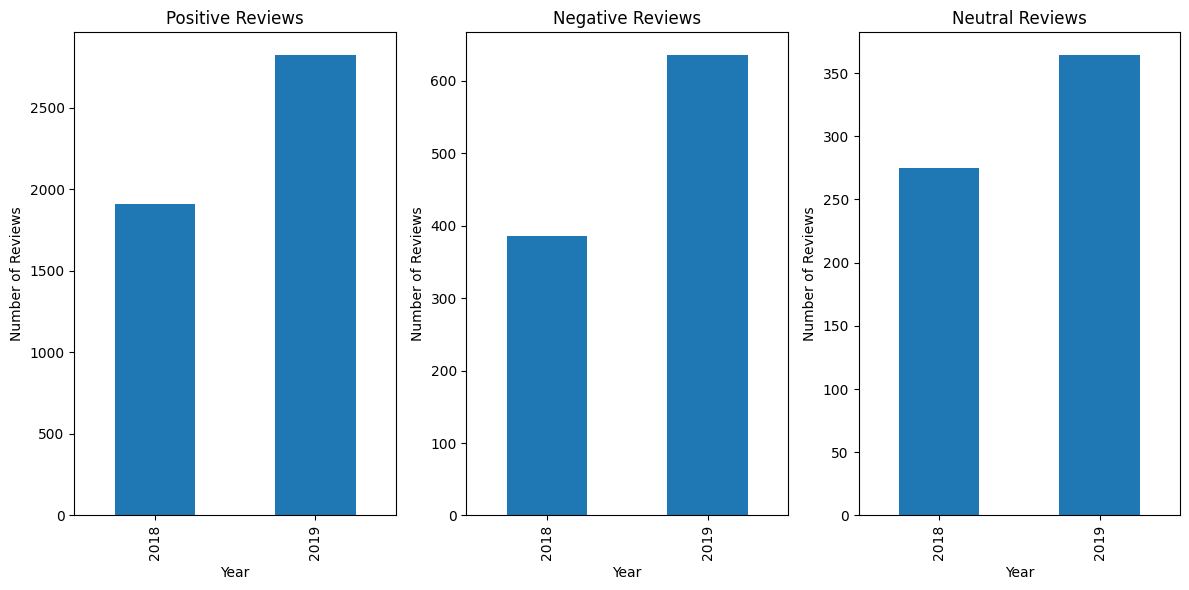

In [43]:
df['year'] = df['date'].dt.year

positive_reviews = df[df['polarity'] == 1]
negative_reviews = df[df['polarity'] == -1]
neutral_reviews = df[df['polarity'] == 0]

positive_count = positive_reviews.groupby('year').size()
negative_count = negative_reviews.groupby('year').size()
neutral_count = neutral_reviews.groupby('year').size()

plt.figure(figsize=(12, 6))

plt.subplot(131)
positive_count.plot(kind='bar', title='Positive Reviews')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

plt.subplot(132)
negative_count.plot(kind='bar', title='Negative Reviews')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

plt.subplot(133)
neutral_count.plot(kind='bar', title='Neutral Reviews')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

2019 seems to having more reviews in all three categories as compared to 2018